# 感知机--随机梯度下降

In [1]:
import scipy.io as sio  #用于读取mat文件
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = sio.loadmat("D:/jupyter/Machine-Learning-Classes-master/2 Perceptron/data_Perc.mat")

In [3]:
data  #读取出的mat文件数据是字典类型

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Mon Sep  9 18:38:17 2019',
 '__version__': '1.0',
 '__globals__': [],
 'x': array([[ 1. ,  1.5,  2.1,  3.1,  3.5,  4. ,  5. ,  5.9,  6.9,  7.9,  8.4,
          9. , 10. , 10.5, 11.2],
        [ 4.5,  6.5,  3.5,  4.9,  6.5,  4.2,  5. ,  2.7,  3.7,  2.2,  2.6,
          1.6,  5. ,  0.8,  1.5]]),
 'y': array([[-1,  1, -1, -1,  1, -1,  1, -1,  1, -1,  1, -1,  1, -1,  1]],
       dtype=int16)}

In [136]:
x = np.array(data['x'])
y = np.array(data['y']) #将字典类型转换为numpy数组
y

array([[-1,  1, -1, -1,  1, -1,  1, -1,  1, -1,  1, -1,  1, -1,  1]],
      dtype=int16)

In [32]:
inx1 = np.argwhere(y==1)[:,1]
inx2 = np.argwhere(y==-1)[:,1] # 给出数据的索引，将数据分成两类
inx1

array([ 1,  4,  6,  8, 10, 12, 14], dtype=int64)

In [8]:
x_1 = x[0,:]
x_2 = x[1,:]

In [9]:
x1 = x_1[inx1]
x2 = x_2[inx1]
x3 = x_1[inx2]
x4 = x_2[inx2]

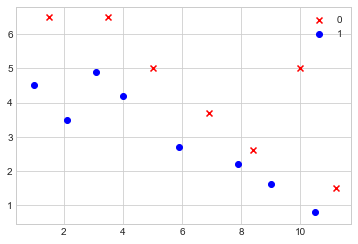

In [137]:
plt.style.use("seaborn-whitegrid") 
plt.scatter(x1,x2,c='r',marker="x",label='0')
plt.scatter(x3,x4,c='b',marker="o",label='1')
plt.legend()

In [142]:
class Model:
    def __init__(self):
        #初始化w, b和学习率
        self.w = np.ones((1,2), dtype=np.float32)     
        self.b = 0 
        self.l_rate = 0.01     
        
    def multiply(self, x, w, b):
        y = np.dot(x,w.T) + b      
        return y
    
    #模型训练，随机梯度下降
    def model_fit(self, X_train, y_train):
        print("start to fit")
        
        loss = []  #用于存放每次的损失值
        n = 0
        while  n < 10000:
            n += 1
            a = [0]*len(X_train)
            for i in range(len(X_train)):
                X = X_train[i]
                y = y_train[i]
                a[i] = y * self.multiply(X, self.w, self.b)
            a = np.array(a,dtype = np.float32)
            inx = np.argwhere(a <= 0).T[0,:]   #找出所有误分类点的索引
            
            delta_w = np.dot(X_train[inx].T,y_train[inx]).T  
            delta_b = sum(y_train[inx])
             #利用所有的误分类点的数据来进行更新参数
            self.w = self.w + self.l_rate * delta_w    
            self.b = self.b + self.l_rate * delta_b
            #求损失值
            temp_loss = -sum(a[inx])
            loss.append(temp_loss)
            
        print("Model training completed!")
        print("w = {}, b = {}".format(self.w, self.b))  #给出训练后的模型参数
        return loss

In [143]:
perceptron = Model()
loss = perceptron.model_fit(x.T, y.T)

start to fit
Model training completed!
w = [[0.523 1.026]], b = [-6.82]


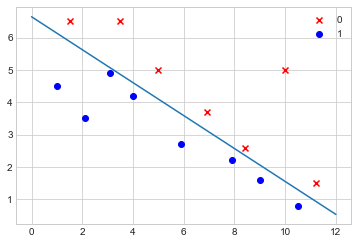

In [144]:
x_points = np.linspace(0,12,10)
y_points = -(perceptron.w[0,0] * x_points + perceptron.b) / perceptron.w[0,1]
plt.plot(x_points, y_points)

plt.scatter(x1,x2,c='r',marker="x",label='0')
plt.scatter(x3,x4,c='b',marker="o",label='1')
plt.legend()

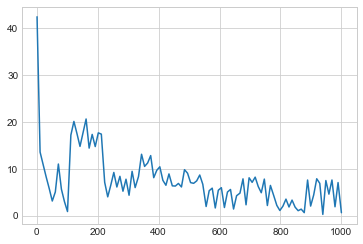

In [146]:
x_point = np.linspace(1,1000,100,dtype=int)
y_point = np.array(loss)[x_point]
plt.plot(x_points,y_points)

## 参考

1.https://github.com/haitaozhao/Machine-Learning-Classes/tree/master